In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as a3d
%matplotlib inline

In [2]:
b_norms = np.asarray(
  [[-1.0, 0.0, 0.0],
  [0.0, -1.0, 0.0],
  [-0.347252784,  -0.782219564,	0.517250479],
  [0.393457551, 0.541547875,	0.742911202],
  [0.636627669,0.206852872,	-0.742911233],
  [0.347252811,0.782219525,	-0.517250519],
  [0.851239679,-0.502239228,	0.152140616],
  [0.740705521,-0.654376459,	-0.152140661],
  [0.347250266,-0.112828417,	0.930960257],
  [0.214610424,0.96477748,	-0.152140661],
  [0.214612459,-0.295388659,	-0.930960274],
  [0.740710551,0.428718814,	0.517250479],
  [0.74071057,-0.428718733,	-0.517250519],
  [0.214612457,0.295388714,	0.930960257],
  [0.636627941,0.571976193,	-0.517250519],
  [0.393458463,0.90666624,	0.152140616],
  [-8.47266E-09,0.365120484,	-0.930960274],
  [4.65998E-08,-0.66938998,	0.742911202],
  [0.851239626,0.502239303,	-0.152140661],
  [0.636628012,-0.57197615,	0.517250479],
  [0.347250215,	0.112828436,	-0.930960274],
  [0.636627721,	-0.206852824,	0.742911202],
  [0.740705466,	0.654376532,	0.152140616],
  [0.347252893,	-0.782219515,	0.517250479],
  [0.393458544,	-0.906666197,	-0.152140661],
  [0.983876179,	0.094025976,	-0.152140661],
  [0.214610515,	-0.964777466,	0.152140616],
  [0.983876194,	-0.094025886,	0.152140616],
  [0.178843722,	-0.836938961,	-0.517250519],
  [0.851242003,	-0.088537859,	-0.517250519],
  [0.851242019,	0.08853794,	0.517250479],
  [-0.983876181,	-0.094026023,	0.152140616],
  [-0.214610381,	-0.964777496,	0.152140616],
  [-0.983876183,	0.094025931,	-0.152140661],
  [-0.178843606,	-0.836938985,	-0.517250519],
  [-0.851241991,	-0.088537977,	-0.517250519],
  [-0.34725022,	0.11282842,	-0.930960274],
  [2.5418E-08,	-0.365120527,	0.930960257],
  [-0.740705496,	0.654376498,	0.152140616],
  [-0.393458418,	-0.906666252,	-0.152140661],
  [-1.55333E-08,	0.669389946,	-0.742911233],
  [-0.740710511,	-0.428718836,	-0.517250519],
  [-0.636627932,	-0.571976239,	0.517250479],
  [-0.85123965,	0.502239263,	-0.152140661],
  [-0.393457505,	-0.541547866,	-0.742911233],
  [-0.636627692,	-0.206852912,	0.742911202],
  [-0.214612471,	0.295388704,	0.930960257],
  [-0.636627968,	0.571976163,	-0.517250519],
  [-0.740710571,	0.428718779,	0.517250479],
  [-0.393458505,	0.906666222,	0.152140616],
  [-0.851239609,	-0.502239346,	0.152140616],
  [-0.34725025,	-0.112828466,	0.930960257],
  [-0.636627678,	0.206852842,	-0.742911233],
  [-0.74070543,	-0.654376562,	-0.152140661],
  [-0.214612418,	-0.295388689,	-0.930960274],
  [-0.851242023,	0.088537901,	0.517250479],
  [-0.178843689,	0.836938992,	0.517250479],
  [-0.214610469,	0.96477747,	-0.152140661],
  [-0.393457576,	0.541547857,	0.742911202],
  [-0.347252847,	0.782219509,	-0.517250519]]
)


In [129]:
bigR = 3
rays = []
R = 0.1
m = 5
dR = R / m

# 0 = a(x - x0) + b(y - y0) + c(z - z0)

for k, b0 in enumerate(b_norms):
    xb, yb, zb = bigR * b0
    B = bigR * b0
        
    if b0[0] == 0 and b0[2] == 0:
        # print(f'{k}: fifth case')
        e1 = np.asarray([1, 0, 0])
        
    elif b0[1] == 0 and b0[2] == 0:
        # print(f'{k}: sixth case')
        e1 = np.asarray([0, 0, 1])

    else:
        # print(f'{k}: else case {b0[0]} / {b0[2]}')
#         A = (xb, dR + yb, zb - (b0[1] / b0[2]) * (dR + yb))
#         e1 = np.asarray([A[0] - B[0], A[1] - B[1], A[2] - B[2]])
#         e1 = e1 / np.linalg.norm(e1)
        e1 = np.asarray([0, dR, -(b0[1] / b0[2]) * dR])
        
    e1 = e1 / np.linalg.norm(e1)
    e2 = np.cross(b0, e1)
    e2 = e2 / np.linalg.norm(e2)

    rays.append([bigR * b0, (bigR * b0) + (dR * e1), (bigR * b0) + (dR * e2)])
#     ray = []
#     for i in range(1, m + 1):
#         r = i * dR
#         n = np.rint(np.pi / np.arcsin(1 / (2 * i))).astype(int)

#         for j in range(n):
#             theta = j * (2 * np.pi) / (n)

#             if b0[0] == 0 and b0[2] == 0:
#                 # seems to work
#                 xr = xb + r * np.cos(theta) * e1[0] + r * np.sin(theta) * e2[0]
#                 yr = yb
#                 zr = zb + r * np.cos(theta) * e1[2] + r * np.sin(theta) * e2[2]
                
#             elif b0[1] == 0 and b0[2] == 0:
#                 # seems to work
#                 xr = xb
#                 yr = yb + r * np.cos(theta) * e1[1] + r * np.sin(theta) * e2[1]
#                 zr = zb + r * np.cos(theta) * e1[2] + r * np.sin(theta) * e2[2]

#             else:
#                 xr = xb + r * np.cos(theta) * e1[0] + r * np.sin(theta) * e2[0]
#                 yr = yb + r * np.cos(theta) * e1[1] + r * np.sin(theta) * e2[1]
#                 zr = zb + r * np.cos(theta) * e1[2] + r * e2[2]

#             ray.append([xr, yr, zr])
            
#     rays.append(ray)

rays = np.asarray(rays)

In [147]:
for b in rays:
    for r in b:
        print(np.dot(r[0], r[1]), np.dot(r[0], r[2]), np.dot(r[1], r[2]))

-0.0 -0.0 0.0
-0.0 -0.06 0.0
-0.06 -0.0 0.0
-0.0 0.0 -0.0
-0.06 0.0 -0.0
-0.0 0.0 -0.06
2.4446512916843957 -1.6165500197227518 -3.641430997459541
2.4331591537726185 -1.6339291725157221 -3.6632770240332353
2.4825202771062567 -1.6415912635757395 -3.6234744387623166
1.9176849058207872 2.6307361993444767 3.6208978448111617
1.9367618395055903 2.6168299978082654 3.6375875168268346
1.8931990875006561 2.597145838159582 3.6415894670236755
1.1851943555458382 -4.256620618848352 -1.3830598996840002
1.2219922367865572 -4.246374781822278 -1.4225686695001463
1.1881900370876088 -4.2673795966974595 -1.367878296522601
2.444651359878013 -1.61655027042563 -3.6414310975036512
2.4561434997003317 -1.5991711169538716 -3.6192170114441153
2.482520341922857 -1.6415915152305296 -3.6234745367105394
-3.8477336330153498 1.1655731621403205 -0.6876988697455599
-3.832926417372378 1.2144540247848872 -0.7137815737606631
-3.873358133591256 1.1733354536638942 -0.7026528199028107
-4.362302303943571 -1.0142228481416045 0.896

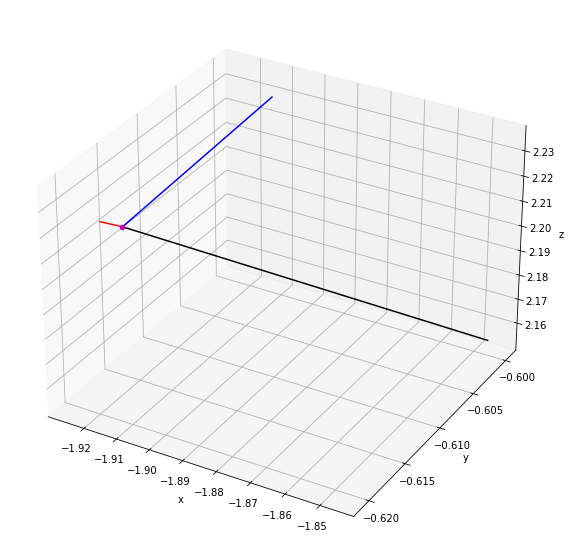

In [144]:
bnum = 45
beam = bigR * b_norms[bnum]
b_rays = rays[bnum]

line = np.arange(bigR - 5 * dR, bigR, dR)
beam_line = np.asarray([b_norms[bnum, :] for i in range(6)]) * line[:, None]

# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111)
# ax.set_aspect('equal')

# ax.scatter(b_rays[:, 1], b_rays[:, 2], color='b')
# ax.plot(beam_line[:, 0], beam_line[:, 2], color='k')
# ax.plot(b_rays[:2, 0], b_rays[:2, 2], 'bo-', label='b0-e1')
# ax.plot(b_rays[::2, 0], b_rays[::2, 2], 'ro-', label='b0-e2')
# ax.legend()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(45, -45)

ax.plot(beam_line[:, 0], beam_line[:, 1], beam_line[:, 2], color='k')
ax.scatter(beam[0], beam[1], beam[2] , color='m')

ax.plot(b_rays[:2, 0], b_rays[:2, 1], b_rays[:2, 2], color='b')
ax.plot(b_rays[::2, 0], b_rays[::2, 1], b_rays[::2, 2], color='r')


# ax.scatter(b_rays[:, 0], b_rays[:, 1], b_rays[:, 2], color='b')


# beam = bigR * b_norms
# ax.scatter(beam[:, 0], beam[:, 1], beam[:, 2], color='r')
# for r in rays:
#   ax.scatter(r[:, 0], r[:, 1], r[:, 2], color='b')

In [ ]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bigR * b_norms[:, 0], bigR * b_norms[:, 1], bigR * b_norms[:, 2], color='r', s=20)
ax.scatter(rays[:, 0], rays[:, 1], rays[:, 2], color='b', s=2)